In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import scipy.stats as st

# Store filepath in a variable
file = Path("Resources/NewYorkAirBnB.csv")
file_df = pd.read_csv(file)
file_df


,id,host_id,host_name,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,...,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,8.020000e+17,495455523,Michael,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,...,1.0,$143.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.660000e+17,488760226,Eric,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,...,1.0,$30.00,13,4.85,4.77,4.77,4.85,4.92,4.85,4.92
2,6.360000e+17,461263600,Tommaso,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,...,2.0,$157.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.680000e+17,475699129,Suliman,Sheepshead Bay,Brooklyn,40.583490,-73.959880,Private room in home,Private room,2,...,1.0,$89.00,15,5.00,5.00,4.87,5.00,5.00,5.00,5.00
4,4.924826e+07,397288055,Katherine,North Riverdale,Bronx,40.903260,-73.907090,Entire rental unit,Entire home/apt,3,...,2.0,$125.00,25,4.48,4.56,4.44,4.72,4.88,4.72,4.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,4.034290e+07,90429772,Hanna,East Village,Manhattan,40.726110,-73.988010,Private room in rental unit,Private room,1,...,1.0,$85.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42927,3.525770e+07,264962468,Mili,Hell's Kitchen,Manhattan,40.762150,-73.990270,Entire rental unit,Entire home/apt,6,...,3.0,$208.00,217,4.48,4.58,4.41,4.65,4.75,4.91,4.51
42928,5.249152e+07,305489297,Stavros,Lower East Side,Manhattan,40.717330,-73.991110,Entire rental unit,Entire home/apt,3,...,3.0,$125.00,7,4.43,4.43,3.29,4.86,4.86,5.00,4.14
42929,4.815880e+07,6600525,Quentin,Bushwick,Brooklyn,40.687350,-73.917660,Private room in loft,Private room,1,...,1.0,$50.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Copy and clean initial df for size comparisons
size_df = file_df[["id", "host_id", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "bathrooms_text",
                   "bedrooms", "beds", "price", "number_of_reviews", "review_scores_rating"]].copy()

# Split bathroom data to enable use as int, get rid of extra columns
size_df[["baths", "shared", "bath"]] = size_df.bathrooms_text.str.split(" ", expand=True)
size_df["baths"] = size_df["baths"].replace("Half-bath", "0.5")
size_df["baths"] = size_df["baths"].replace("Private", "0.5")
size_df["baths"] = size_df["baths"].replace("Shared", "0.5")

size_df["baths"] = size_df["baths"].astype(float)
size_df = size_df[["id", "host_id", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "baths", "bedrooms",
                   "beds", "price", "number_of_reviews", "review_scores_rating"]]

size_df.columns = ["ID", "Host ID", "Neighborhood", "Borough", "Property Type", "Room Type", "Capacity", "Baths", "Bedrooms",
                        "Beds", "Price", "Number of Reviews", "Overall Review Score"]
size_df

,ID,Host ID,Neighborhood,Borough,Property Type,Room Type,Capacity,Baths,Bedrooms,Beds,Price,Number of Reviews,Overall Review Score
0,8.020000e+17,495455523,Canarsie,Brooklyn,Private room in home,Private room,2,1.0,1.0,1.0,$143.00,0,NaN
1,7.660000e+17,488760226,Canarsie,Brooklyn,Private room in rental unit,Private room,1,1.0,1.0,1.0,$30.00,13,4.85
2,6.360000e+17,461263600,Tottenville,Staten Island,Entire villa,Entire home/apt,6,2.0,2.0,2.0,$157.00,0,NaN
3,7.680000e+17,475699129,Sheepshead Bay,Brooklyn,Private room in home,Private room,2,2.0,3.0,1.0,$89.00,15,5.00
4,4.924826e+07,397288055,North Riverdale,Bronx,Entire rental unit,Entire home/apt,3,1.0,2.0,2.0,$125.00,25,4.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,4.034290e+07,90429772,East Village,Manhattan,Private room in rental unit,Private room,1,1.0,1.0,1.0,$85.00,0,NaN
42927,3.525770e+07,264962468,Hell's Kitchen,Manhattan,Entire rental unit,Entire home/apt,6,1.0,2.0,3.0,$208.00,217,4.48
42928,5.249152e+07,305489297,Lower East Side,Manhattan,Entire rental unit,Entire home/apt,3,1.0,3.0,3.0,$125.00,7,4.43
42929,4.815880e+07,6600525,Bushwick,Brooklyn,Private room in loft,Private room,1,2.0,6.0,1.0,$50.00,0,NaN


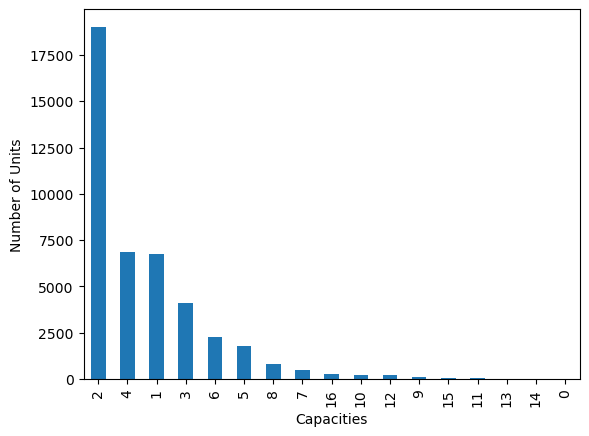

In [3]:
# Bar Graph showing Capacity of AirBnBs vs. Number of Units
size_df["Capacity"].value_counts().plot(kind="bar")
plt.xlabel("Capacities")
plt.ylabel("Number of Units")
plt.show()


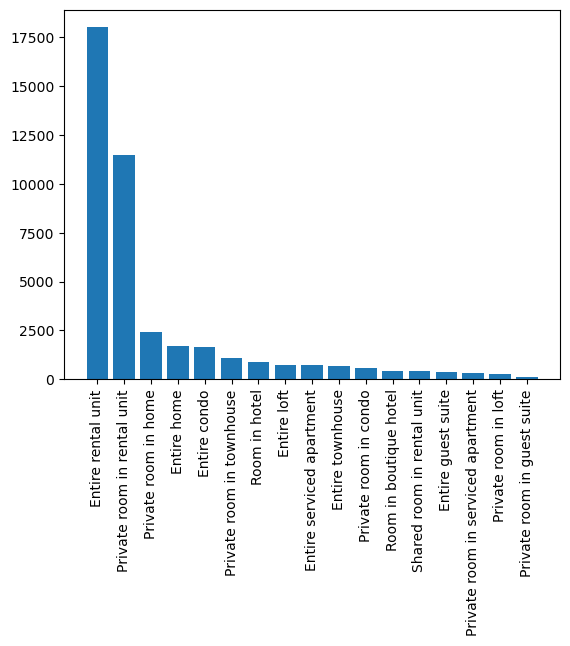

In [67]:
# Bar Graph showing Property Type of AirBnBs vs. Number of Units
type_counts = size_df["Property Type"].value_counts()
type_counts = type_counts[type_counts > 100]
type_list = type_counts.index.tolist()
plt.bar(type_list, type_counts)
plt.xticks(rotation=90)
plt.show()

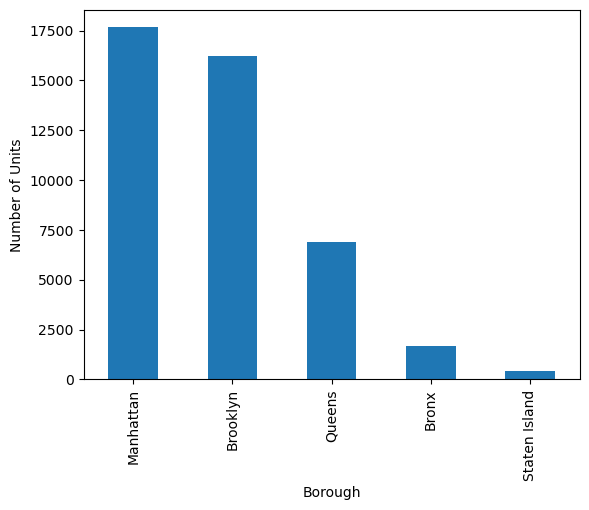

In [4]:
# Bar graph Boroughs vs. Number of Units
size_df["Borough"].value_counts().plot(kind="bar")
plt.xlabel("Borough")
plt.ylabel("Number of Units")
plt.show()


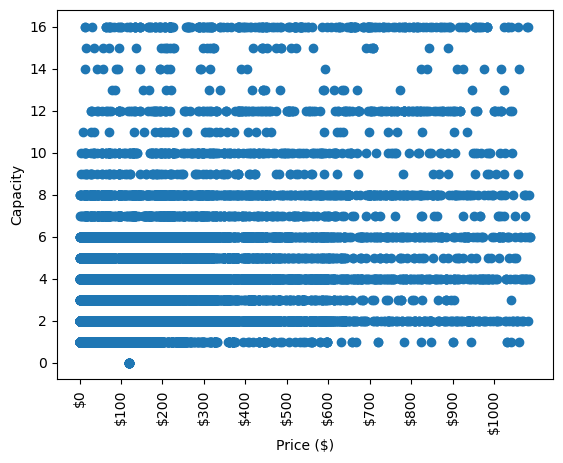

In [5]:
# Scatter Plot showing Prices of All Units vs. Capacity of Units
x = size_df["Price"]
y = size_df["Capacity"]
plt.scatter(x,y)

plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
           ["$0", "$100", '$200', '$300', '$400', '$500', '$600', '$700', '$800', '$900', '$1000'], 
           rotation=90)

plt.show()

In [6]:
# Summary stats dataframe by borough
size_df["Price"] = size_df["Price"].str.replace("$", "")
size_df["Price"] = size_df["Price"].str.replace(",", "")
size_df["Price"] = size_df["Price"].astype(float)

borough_mean = size_df.groupby(["Borough"]).mean(numeric_only=True)
borough_med = size_df.groupby(["Borough"]).median(numeric_only=True)
borough_var = size_df.groupby(["Borough"]).var(numeric_only=True)
borough_std = size_df.groupby(["Borough"]).std(numeric_only=True)
borough_sem = size_df.groupby(["Borough"]).sem(numeric_only=True)

borough_stats = pd.DataFrame({"Mean Price":borough_mean["Price"], "Median Price":borough_med["Price"], "Price Variance":borough_var["Price"],
                                "Price Std Dev":borough_std["Price"], "Price Std Err":borough_sem["Price"]})

borough_stats

C:\Users\Michael\AppData\Local\Temp\ipykernel_15628\2140820170.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  size_df["Price"] = size_df["Price"].str.replace("$", "")


,Mean Price,Median Price,Price Variance,Price Std Dev,Price Std Err
Borough,,,,,
Bronx,117.512123,87.0,6.906956e+04,262.810878,6.391040
Brooklyn,162.766829,110.0,1.088101e+06,1043.120669,8.186187
Manhattan,268.365783,165.0,6.517626e+05,807.318180,6.075387
Queens,128.173655,90.0,9.470758e+04,307.745972,3.700538
Staten Island,309.037296,99.0,1.002534e+07,3166.281483,152.869511


In [7]:
# Put boroughs into a list for for loop (and later for plot labels)
five_boroughs = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]

# Create empty list to fill with borough data (for plotting)
borough_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for borough in five_boroughs:

    df1 = size_df.loc[size_df["Borough"] == borough]
    capacity_df = df1.loc[df1["Capacity"] == df1["Capacity"]]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    cap_by_borough = capacity_df["Price"]
    
    # add subset 
    borough_data.append(cap_by_borough)
    
    # Determine outliers using upper and lower bounds
    quartiles = cap_by_borough.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #outliers = outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    outliers = (cap_by_borough.loc[(capacity_df['Price'] >= upper_bound) | 
                                        (capacity_df['Price'] <= lower_bound)])
    
    print(f"{borough}'s potential outliers: {outliers}")
    print(f"{borough}'s upper bound = {upper_bound}")
    print(f"{borough}'s lower bound = {lower_bound}")


Bronx's potential outliers: 18       301.0
279      300.0
300      500.0
307      500.0
321      267.0
         ...  
38620    300.0
41032    259.0
41616    250.0
42282    250.0
42913    650.0
Name: Price, Length: 106, dtype: float64
Bronx's upper bound = 245.5
Bronx's lower bound = -54.5
Brooklyn's potential outliers: 147       444.0
304      3600.0
603       375.0
606       500.0
609       770.0
          ...  
42716     754.0
42769     450.0
42810     360.0
42846     595.0
42907     375.0
Name: Price, Length: 935, dtype: float64
Brooklyn's upper bound = 348.5
Brooklyn's lower bound = -103.5
Manhattan's potential outliers: 704      5065.0
716      1400.0
750      2000.0
973      1800.0
1002      550.0
          ...  
42889     600.0
42892    1271.0
42897    1800.0
42899     600.0
42920     857.0
Name: Price, Length: 1380, dtype: float64
Manhattan's upper bound = 528.5
Manhattan's lower bound = -155.5
Queens's potential outliers: 10       975.0
15       380.0
30       280.0
49       3

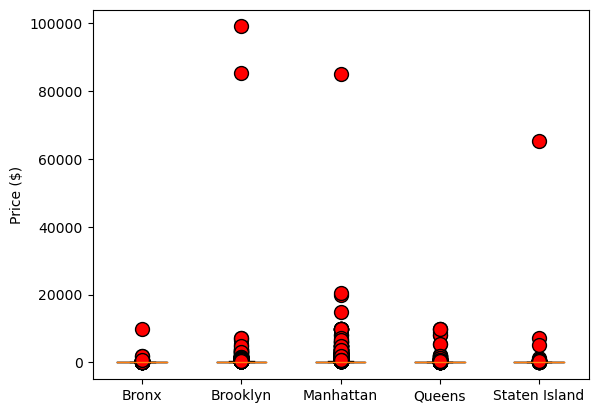

In [8]:
# Box plot showing prices of units across different boroughs
flierprops = dict(marker='o', markerfacecolor='r', markersize=10)

plt.boxplot(borough_data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4, 5], ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"])
plt.ylabel("Price ($)")
plt.show()

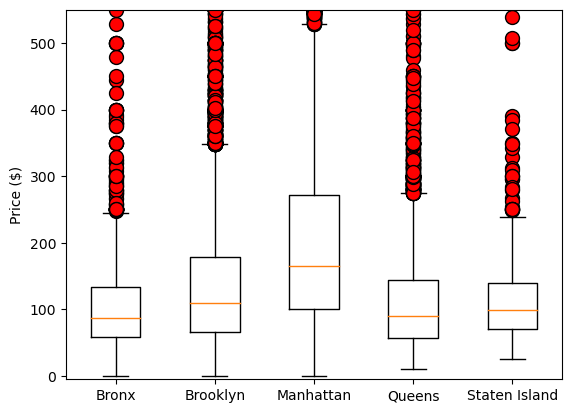

In [9]:
# Box plot showing prices of units across boroughs where y-axis is limited at 550 based on earlier calculation of outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=10)

plt.boxplot(borough_data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4, 5], ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"])
plt.ylabel("Price ($)")
plt.ylim(-5,550)
plt.show()


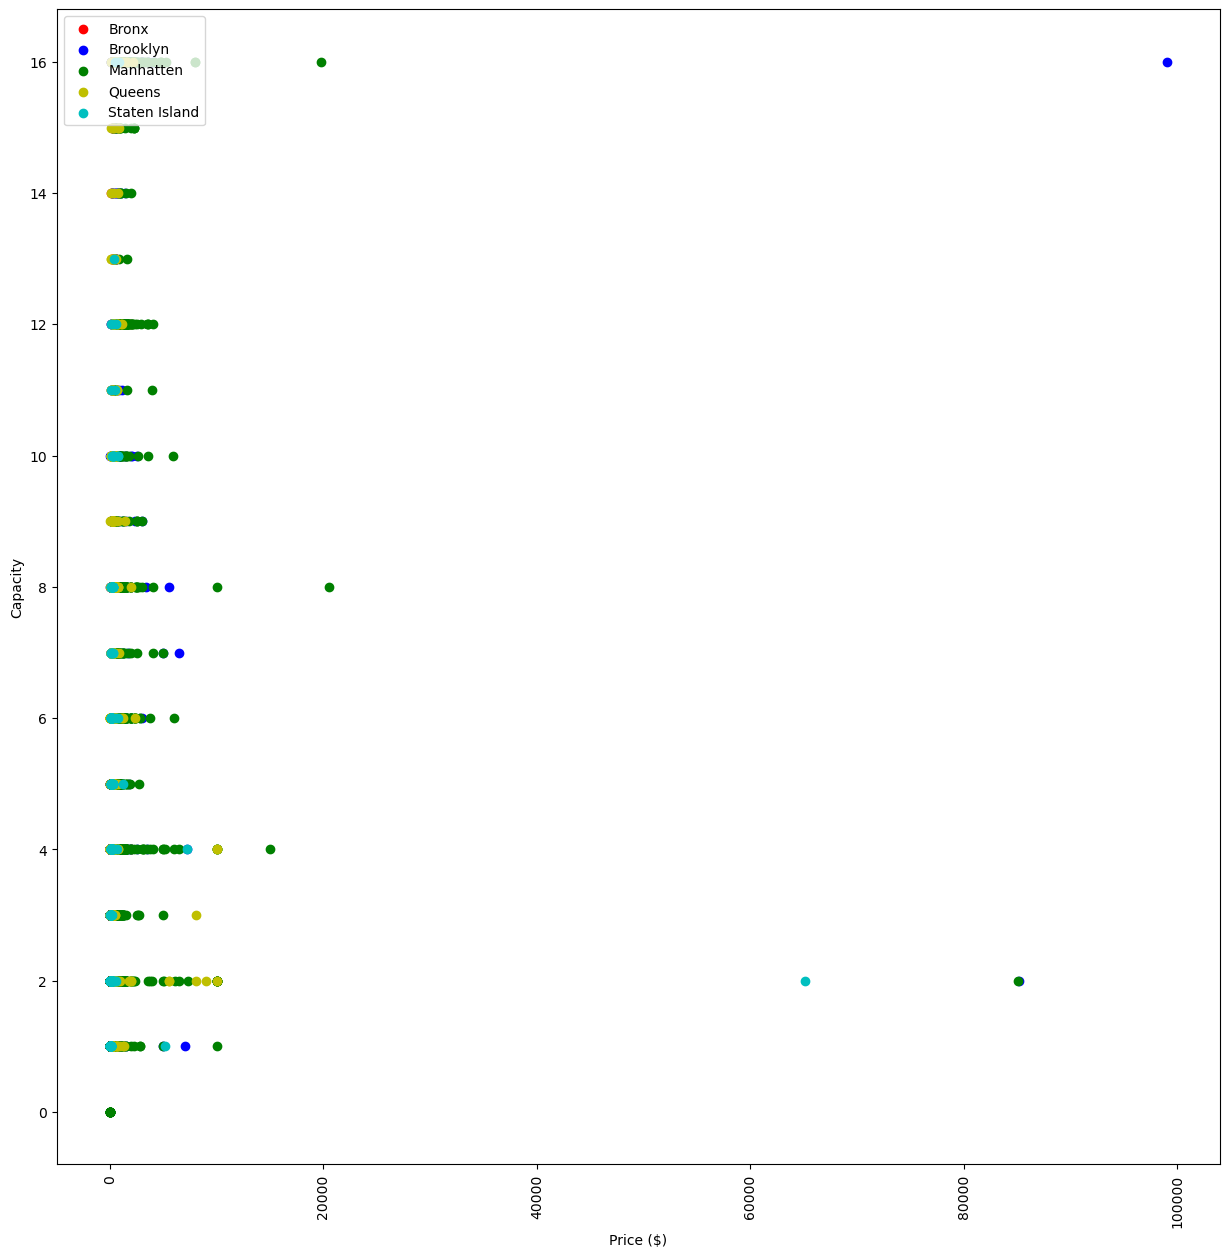

In [10]:
# Scatter plot of Price of Unit vs. Capacity across all boroughs
bronx_df = size_df[(size_df["Borough"] == "Bronx")]
brooklyn_df = size_df[(size_df["Borough"] == "Brooklyn")]
manhattan_df = size_df[(size_df["Borough"] == "Manhattan")]
queens_df = size_df[(size_df["Borough"] == "Queens")]
staten_df = size_df[(size_df["Borough"] == "Staten Island")]

bronx_x = bronx_df["Price"]
bronx_y = bronx_df["Capacity"]
brooklyn_x = brooklyn_df["Price"]
brooklyn_y = brooklyn_df["Capacity"]
manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]
queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]
staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(15,15))
plt.scatter(bronx_x, bronx_y, color="r", label="Bronx")
plt.scatter(brooklyn_x, brooklyn_y, color="b", label="Brooklyn")
plt.scatter(manhattan_x, manhattan_y, color="g", label="Manhatten")
plt.scatter(queens_x, queens_y, color="y", label="Queens")
plt.scatter(staten_x, staten_y, color="c", label="Staten Island")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
plt.legend(loc="upper left")

plt.show()


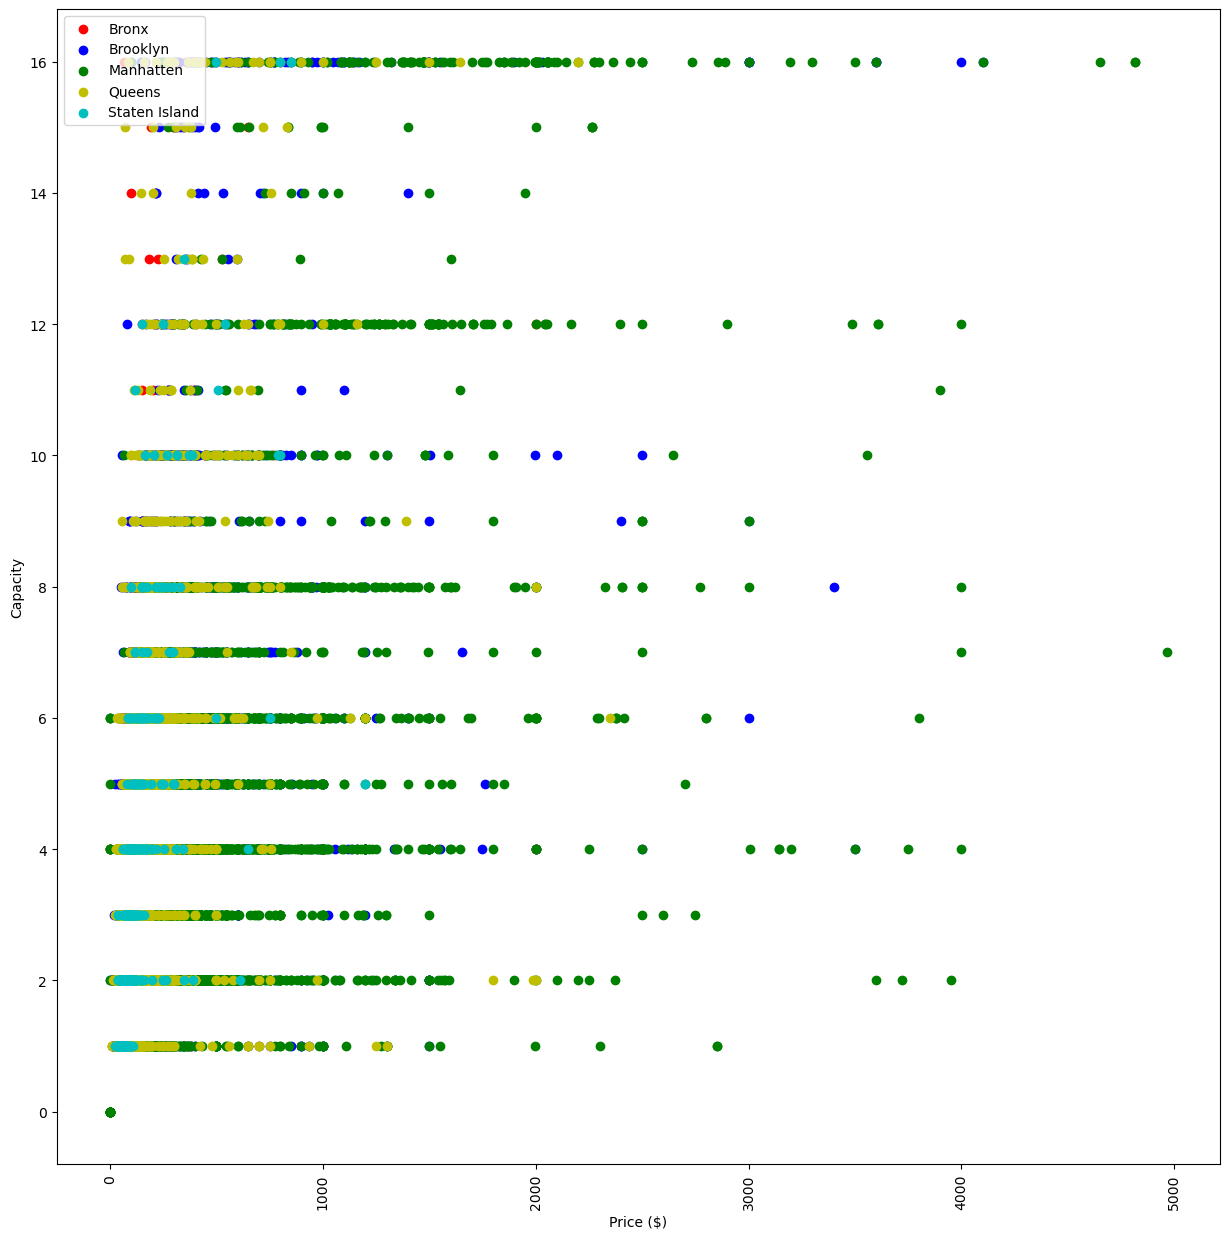

In [11]:
# Scatter plot of Price of Unit vs. Capacity across all boroughs with price limited at $5000
size_no_outliers = size_df[size_df["Price"] < 5000]

bronx_df = size_no_outliers[(size_no_outliers["Borough"] == "Bronx")]
brooklyn_df = size_no_outliers[(size_no_outliers["Borough"] == "Brooklyn")]
manhattan_df = size_no_outliers[(size_no_outliers["Borough"] == "Manhattan")]
queens_df = size_no_outliers[(size_no_outliers["Borough"] == "Queens")]
staten_df = size_no_outliers[(size_no_outliers["Borough"] == "Staten Island")]

bronx_x = bronx_df["Price"]
bronx_y = bronx_df["Capacity"]
brooklyn_x = brooklyn_df["Price"]
brooklyn_y = brooklyn_df["Capacity"]
manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]
queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]
staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(15,15))
plt.scatter(bronx_x, bronx_y, color="r", label="Bronx")
plt.scatter(brooklyn_x, brooklyn_y, color="b", label="Brooklyn")
plt.scatter(manhattan_x, manhattan_y, color="g", label="Manhatten")
plt.scatter(queens_x, queens_y, color="y", label="Queens")
plt.scatter(staten_x, staten_y, color="c", label="Staten Island")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.show()

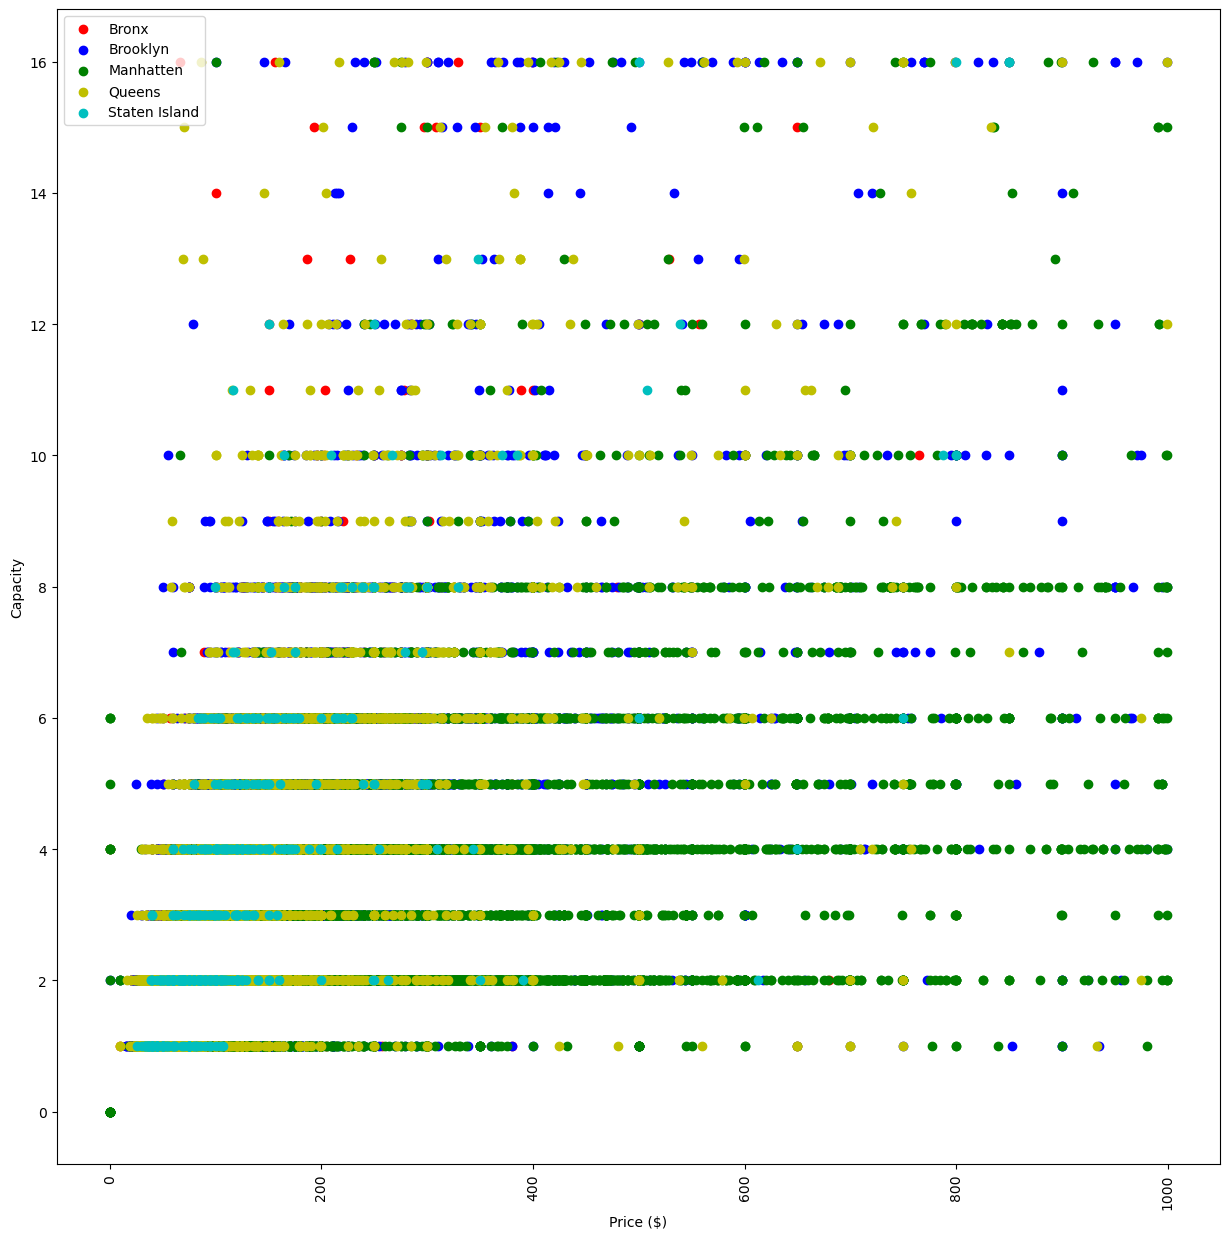

In [12]:
# Scatter plot of Price of Unit vs. Capacity across all boroughs with price limited at $1000
size_no_outliers = size_df[size_df["Price"] < 1000]

bronx_df = size_no_outliers[(size_no_outliers["Borough"] == "Bronx")]
brooklyn_df = size_no_outliers[(size_no_outliers["Borough"] == "Brooklyn")]
manhattan_df = size_no_outliers[(size_no_outliers["Borough"] == "Manhattan")]
queens_df = size_no_outliers[(size_no_outliers["Borough"] == "Queens")]
staten_df = size_no_outliers[(size_no_outliers["Borough"] == "Staten Island")]

bronx_x = bronx_df["Price"]
bronx_y = bronx_df["Capacity"]
brooklyn_x = brooklyn_df["Price"]
brooklyn_y = brooklyn_df["Capacity"]
manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]
queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]
staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(15,15))
plt.scatter(bronx_x, bronx_y, color="r", label="Bronx")
plt.scatter(brooklyn_x, brooklyn_y, color="b", label="Brooklyn")
plt.scatter(manhattan_x, manhattan_y, color="g", label="Manhatten")
plt.scatter(queens_x, queens_y, color="y", label="Queens")
plt.scatter(staten_x, staten_y, color="c", label="Staten Island")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.show()

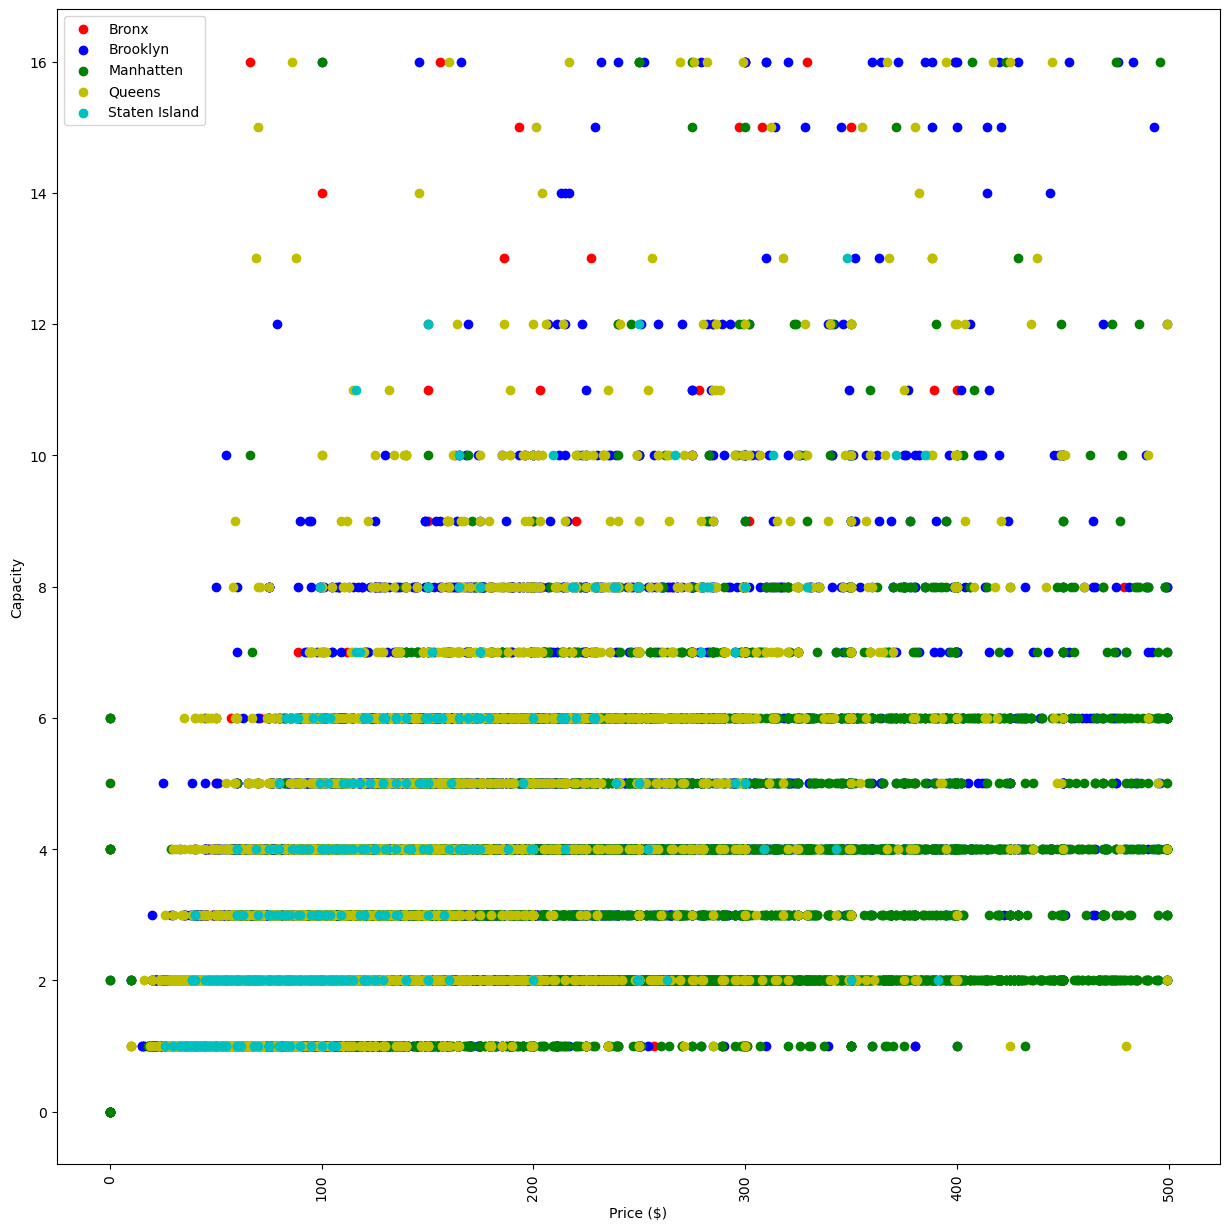

In [13]:
# Scatter plot of Price of Unit vs. Capacity across all boroughs with price limited at $500
size_no_outliers = size_df[size_df["Price"] < 500]

bronx_df = size_no_outliers[(size_no_outliers["Borough"] == "Bronx")]
brooklyn_df = size_no_outliers[(size_no_outliers["Borough"] == "Brooklyn")]
manhattan_df = size_no_outliers[(size_no_outliers["Borough"] == "Manhattan")]
queens_df = size_no_outliers[(size_no_outliers["Borough"] == "Queens")]
staten_df = size_no_outliers[(size_no_outliers["Borough"] == "Staten Island")]

bronx_x = bronx_df["Price"]
bronx_y = bronx_df["Capacity"]
brooklyn_x = brooklyn_df["Price"]
brooklyn_y = brooklyn_df["Capacity"]
manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]
queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]
staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(15,15))
plt.scatter(bronx_x, bronx_y, color="r", label="Bronx")
plt.scatter(brooklyn_x, brooklyn_y, color="b", label="Brooklyn")
plt.scatter(manhattan_x, manhattan_y, color="g", label="Manhatten")
plt.scatter(queens_x, queens_y, color="y", label="Queens")
plt.scatter(staten_x, staten_y, color="c", label="Staten Island")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.show()

The coorelation between price and capactiy is 0.6


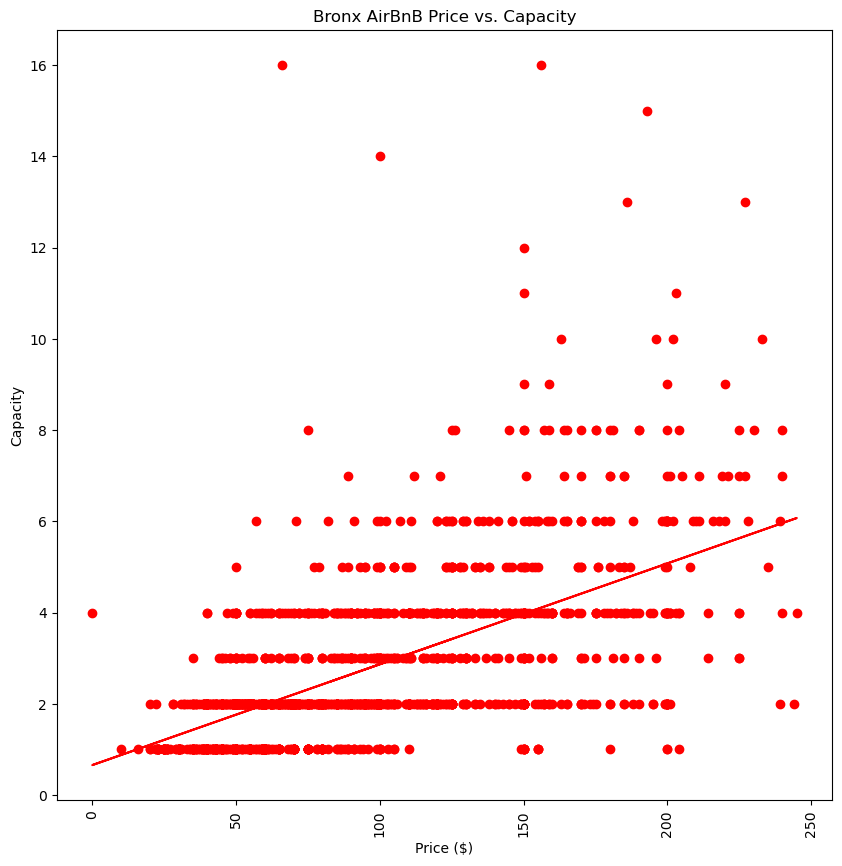

In [14]:
# Scatter plot of Price vs. Capacity in the Bronx where priced is capped at $245.50 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] < 245.5]
bronx_df = size_no_outliers[(size_no_outliers["Borough"] == "Bronx")]

bronx_x = bronx_df["Price"]
bronx_y = bronx_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(bronx_x, bronx_y, color="r")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Bronx AirBnB Price vs. Capacity")

x = bronx_x
y = bronx_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

plt.show()

In [36]:
# Summary stats dataframe by borough
#size_df["Price"] = size_df["Price"].str.replace("$", "")
#size_df["Price"] = size_df["Price"].str.replace(",", "")
bronx_df["Price"] = bronx_df["Price"].astype(float)

hood_mean = bronx_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = bronx_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = bronx_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = bronx_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = bronx_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Allerton,3.306122,3.0,3.466837,1.861944,0.265992
Baychester,3.297297,2.0,3.659159,1.912893,0.314478
Belmont,2.761905,2.0,2.478513,1.574329,0.242924
Bronxdale,2.280000,2.0,1.460000,1.208305,0.241661
Castle Hill,3.875000,4.0,2.410714,1.552648,0.548944
City Island,2.833333,2.0,1.606061,1.267304,0.365839
Claremont Village,2.323529,2.0,2.528520,1.590132,0.272705
Clason Point,2.538462,2.0,1.939668,1.392720,0.193135
Co-op City,1.500000,1.5,0.333333,0.577350,0.288675


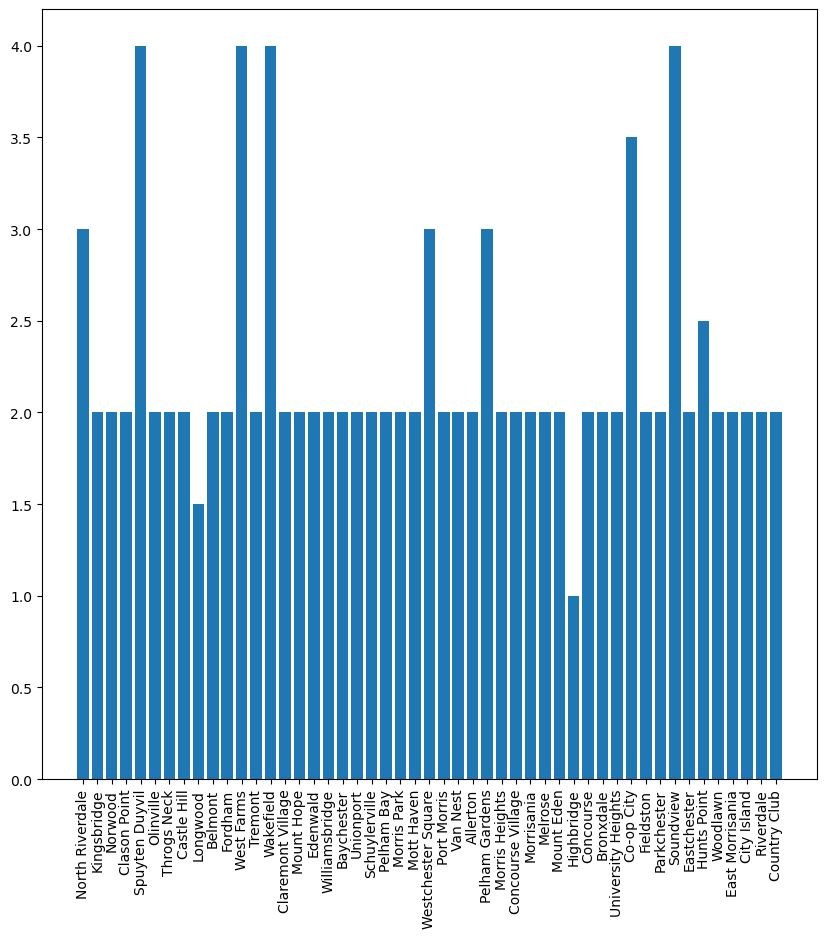

In [38]:
hood_list = bronx_df["Neighborhood"].unique()
plt.figure(figsize=(10,10))
plt.bar(hood_list, hood_stats["Median Capacity"])
plt.xticks(rotation=90)
plt.show()

The coorelation between price and capactiy is 0.55


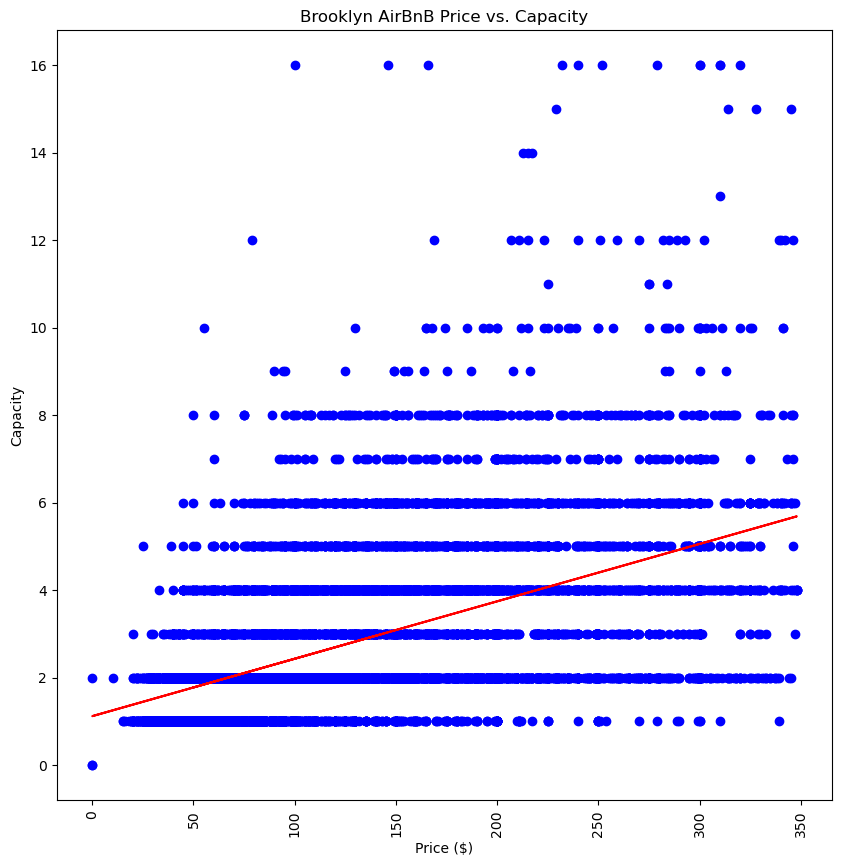

In [16]:
# Scatter plot of Price vs. Capacity in Brooklyn where priced is capped at $348.50 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] < 348.5]
brooklyn_df = size_no_outliers[(size_no_outliers["Borough"] == "Brooklyn")]

brooklyn_x = brooklyn_df["Price"]
brooklyn_y = brooklyn_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(brooklyn_x, brooklyn_y, color="b")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Brooklyn AirBnB Price vs. Capacity")

x = brooklyn_x
y = brooklyn_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

plt.show()

In [17]:
# Summary stats dataframe by borough
#size_df["Price"] = size_df["Price"].str.replace("$", "")
#size_df["Price"] = size_df["Price"].str.replace(",", "")
brooklyn_df["Price"] = brooklyn_df["Price"].astype(float)

hood_mean = brooklyn_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = brooklyn_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = brooklyn_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = brooklyn_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = brooklyn_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Price":hood_mean["Price"], "Median Price":hood_med["Price"], "Price Variance":hood_var["Price"],
                                "Price Std Dev":hood_std["Price"], "Price Std Err":hood_sem["Price"]})

hood_stats

C:\Users\Michael\AppData\Local\Temp\ipykernel_15628\398957024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_df["Price"] = brooklyn_df["Price"].astype(float)


,Mean Price,Median Price,Price Variance,Price Std Dev,Price Std Err
Neighborhood,,,,,
Bath Beach,112.851852,99.0,2663.284900,51.607024,9.931776
Bay Ridge,100.808219,78.5,3974.556070,63.044080,5.217565
Bedford-Stuyvesant,110.598163,95.0,4409.488914,66.403983,1.224882
Bensonhurst,95.901235,99.0,2536.740123,50.366061,5.596229
Bergen Beach,163.550000,152.5,2659.734211,51.572611,11.531986
Boerum Hill,163.877193,150.0,5684.126378,75.393145,7.061215
Borough Park,82.857143,65.0,3236.546032,56.890650,5.963761
Brighton Beach,107.027778,92.0,2671.069640,51.682392,6.090828
Brooklyn Heights,169.987654,157.0,5033.537346,70.947427,7.883047


The coorelation between price and capactiy is 0.42


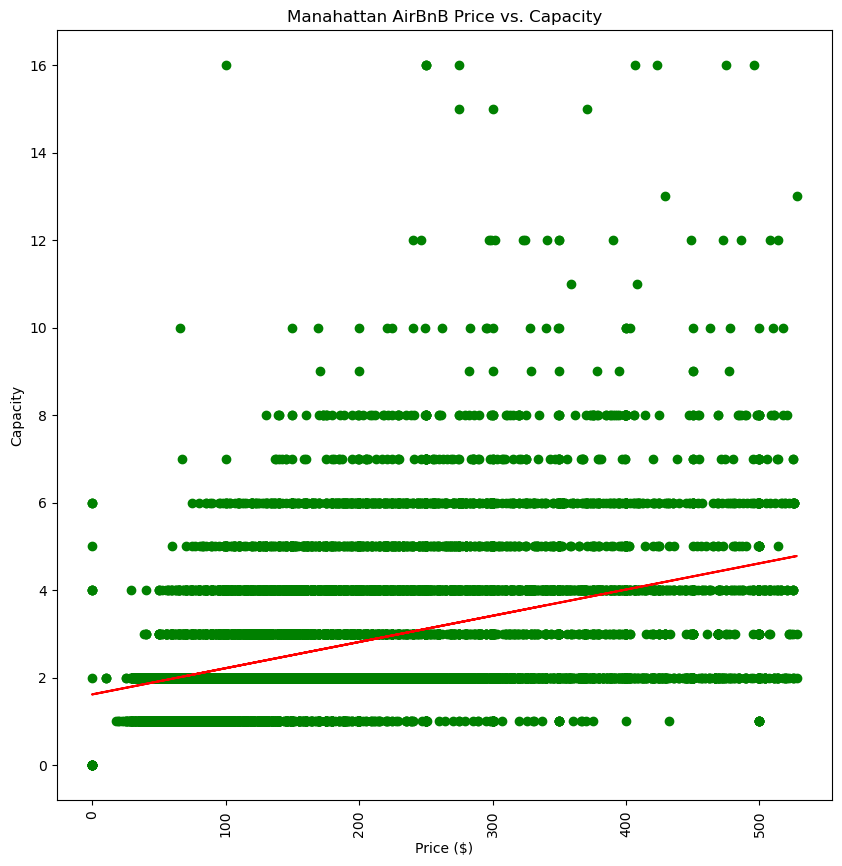

In [18]:
# Scatter plot of Price vs. Capacity in Manhattan where priced is capped at $528.50 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] < 528.5]
manhattan_df = size_no_outliers[(size_no_outliers["Borough"] == "Manhattan")]

manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(manhattan_x, manhattan_y, color="g")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Manahattan AirBnB Price vs. Capacity")

x = manhattan_x
y = manhattan_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

plt.show()

The coorelation between price and capactiy is 0.39


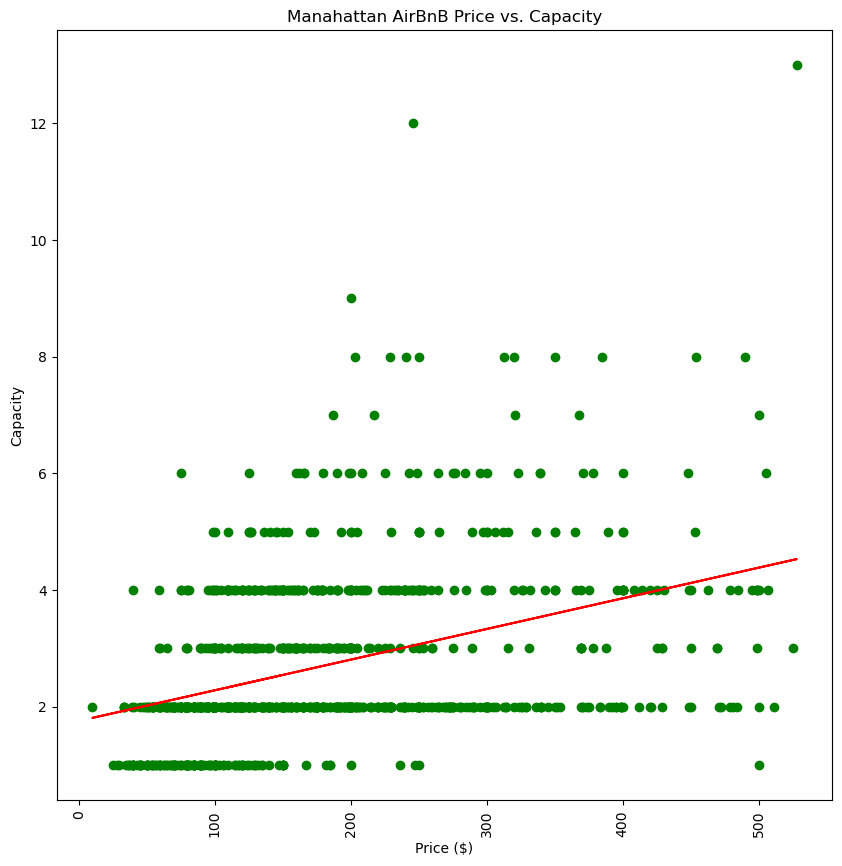

In [19]:
# Scatter plot of Price vs. Capacity in Manhattan where priced is capped at $528.50 based on the earlier calculated upper limit
# Random sample of 1000 units used
size_no_outliers = size_df[size_df["Price"] < 528.5]
manhattan_df = size_no_outliers[(size_no_outliers["Borough"] == "Manhattan")]
manhattan_df = manhattan_df.sample(n=1000)

manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(manhattan_x, manhattan_y, color="g")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Manahattan AirBnB Price vs. Capacity")

x = manhattan_x
y = manhattan_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

plt.show()

The coorelation between price and capactiy is 0.61


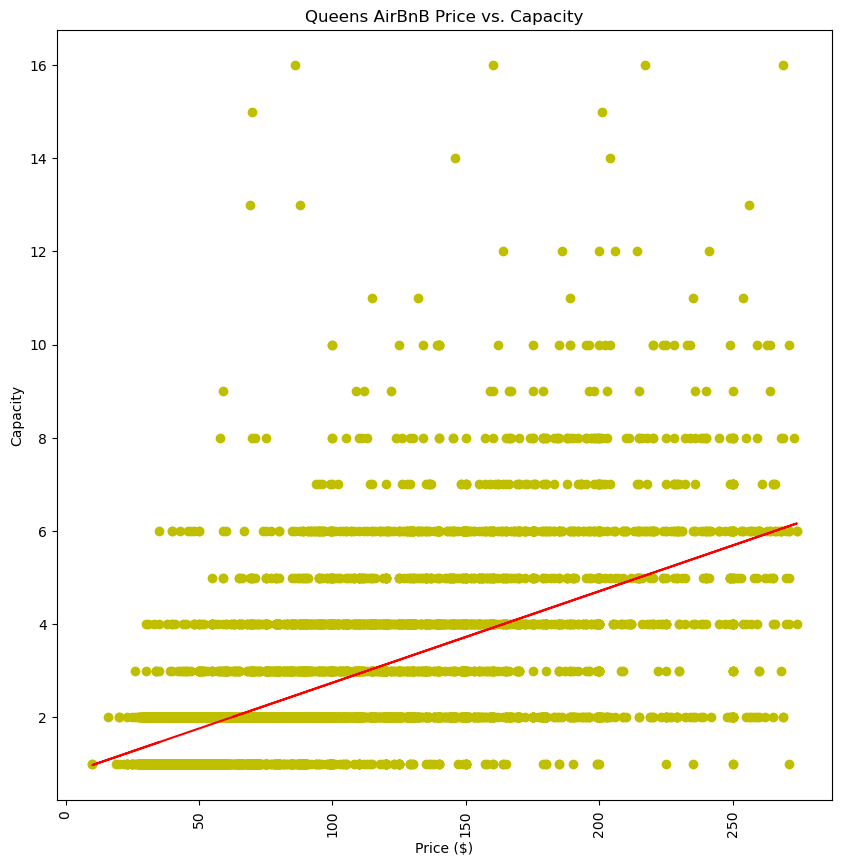

In [20]:
# Scatter plot of Price vs. Capacity in Queens where priced is capped at $274.50 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] < 274.5]
queens_df = size_no_outliers[(size_no_outliers["Borough"] == "Queens")]

queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(queens_x, queens_y, color="y")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Queens AirBnB Price vs. Capacity")

x = queens_x
y = queens_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

plt.show()

The coorelation between price and capactiy is 0.6


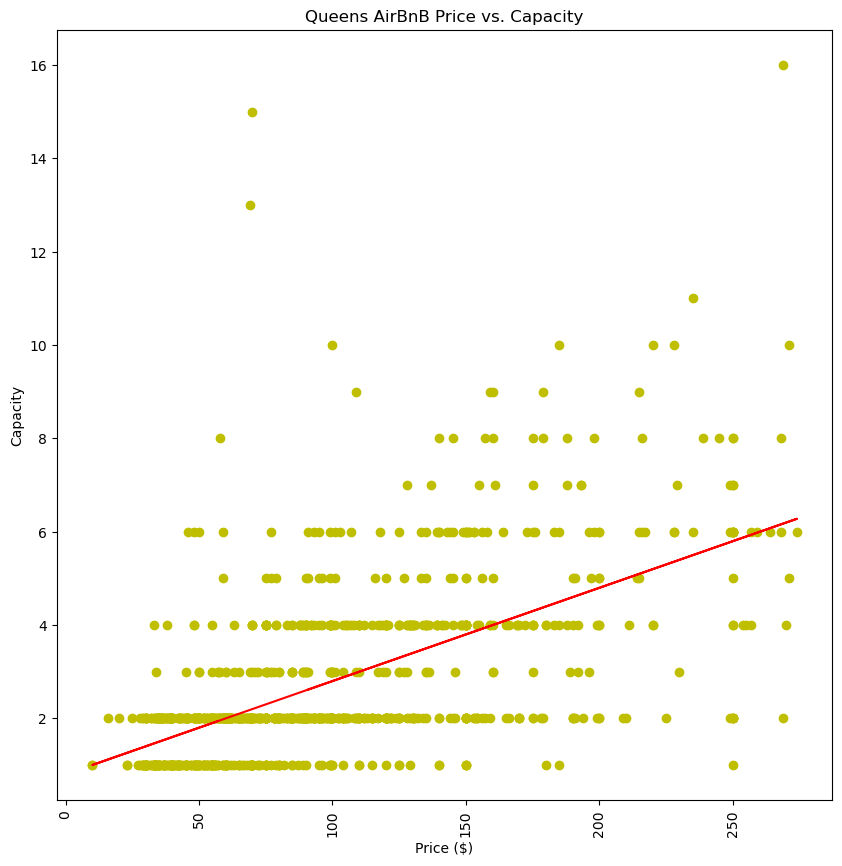

In [21]:
# Scatter plot of Price vs. Capacity in Queens where priced is capped at $274.50 based on the earlier calculated upper limit
# Random sample of 1000 units used
size_no_outliers = size_df[size_df["Price"] < 274.5]
queens_df = size_no_outliers[(size_no_outliers["Borough"] == "Queens")]
queens_df = queens_df.sample(n=1000)

queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(queens_x, queens_y, color="y")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Queens AirBnB Price vs. Capacity")

x = queens_x
y = queens_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

plt.show()

The coorelation between price and capactiy is 0.7


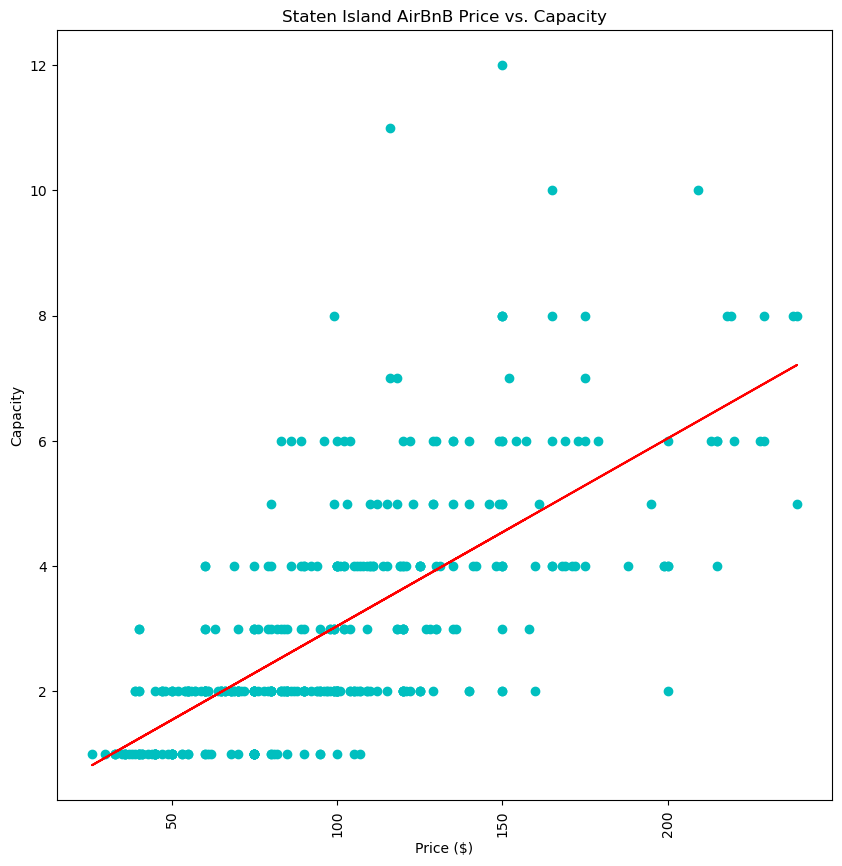

In [22]:
# Scatter plot of Price vs. Capacity in Staten Island where priced is capped at $245.00 based on the earlier calculated upper limit
size_no_outliers = size_df[size_df["Price"] < 245]
staten_df = size_no_outliers[(size_no_outliers["Borough"] == "Staten Island")]

staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(staten_x, staten_y, color="c")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Staten Island AirBnB Price vs. Capacity")

x = staten_x
y = staten_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

plt.show()

The coorelation between price and capactiy is 0.7


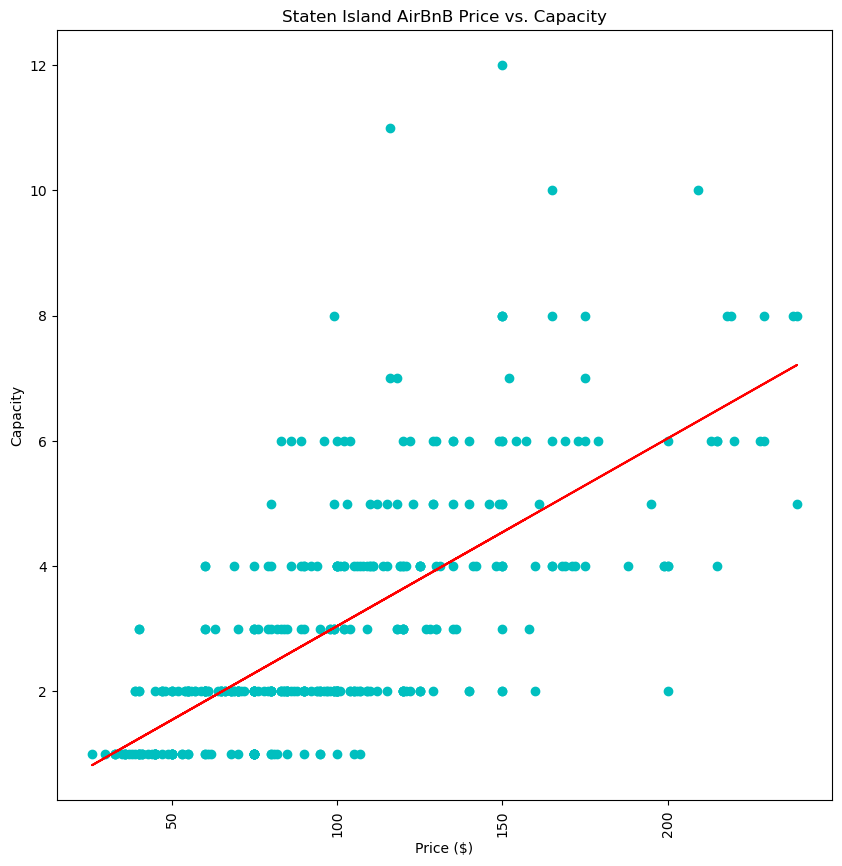

In [23]:
# Scatter plot of Price vs. Capacity in Staten Island where priced is capped at $245.00 based on the earlier calculated upper limit
# Random sample of 1000 units used
size_no_outliers = size_df[size_df["Price"] < 245]
staten_df = size_no_outliers[(size_no_outliers["Borough"] == "Staten Island")]

staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(10,10))
plt.scatter(staten_x, staten_y, color="c")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
#plt.legend(loc="upper left")
plt.title("Staten Island AirBnB Price vs. Capacity")

x = staten_x
y = staten_y
correlation = st.pearsonr(x, y)
print(f"The coorelation between price and capactiy is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")

plt.show()

In [24]:
# Summary stats dataframe by borough
#size_df["Price"] = size_df["Price"].str.replace("$", "")
#size_df["Price"] = size_df["Price"].str.replace(",", "")
size_df["Price"] = size_df["Price"].astype(float)

hood_mean = size_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = size_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = size_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = size_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = size_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Price":hood_mean["Price"], "Median Price":hood_med["Price"], "Price Variance":hood_var["Price"],
                                "Price Std Dev":hood_std["Price"], "Price Std Err":hood_sem["Price"]})

hood_stats

,Mean Price,Median Price,Price Variance,Price Std Dev,Price Std Err
Neighborhood,,,,,
Allerton,121.547170,99.0,9148.906386,95.649916,13.138526
Arden Heights,89.750000,95.0,1452.916667,38.117144,19.058572
Arrochar,129.214286,104.5,6947.258242,83.350214,22.276282
Arverne,191.406780,132.0,32553.200637,180.425055,16.609473
Astoria,111.283093,85.0,8773.108730,93.664875,3.390896
...,...,...,...,...,...
Windsor Terrace,167.621622,139.0,17682.364619,132.975053,12.621433
Woodhaven,89.865979,72.0,3385.950601,58.188922,5.908190
Woodlawn,127.500000,88.5,9395.961538,96.932768,25.906372
